<a href="https://colab.research.google.com/github/BaskaranV15/Ex-5--AAI/blob/main/Kalmanfilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np

class KalmanFilter:
    def __init__(self, F, H, Q, R, x0, P0):
        self.F = F
        self.H = H
        self.Q = Q
        self.R = R
        self.x = x0
        self.P = P0
    def predict(self):
      self.x = np.dot(self.F, self.x)
      self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q

    def update (self, z):
      y=z - np.dot(self.H, self.x)
      S = np.dot (np.dot(self.H, self.P), self.H.T)+ self.R
      K = np.dot (np.dot (self.P, self.H.T), np.linalg.inv(S))
      self.x = self.x + np.dot (K, y)
      self.P = np.dot (np.eye(self.F.shape[0]) -np.dot (K, self.H), self.P)

In [12]:
dt = 0.1
F = np.array([[1, dt], [0, 1]])
H = np.array([[1, 0]])
Q = np.diag([0.1, 0.1])
R = np.array([[1]])
x0 = np.array([0, 0])
P0 = np.diag([1, 1])

In [13]:
kf=KalmanFilter(F,H,Q,R,x0,P0)
true_states = []
measurements = []
for i in range(100):
  true_states.append([i*dt, 1])
  measurements.append(i*dt +np.random.normal(scale=1))
est_states=[]
for z in measurements:
  kf.predict()
  kf.update (np.array([z]))
  est_states.append(kf.x)

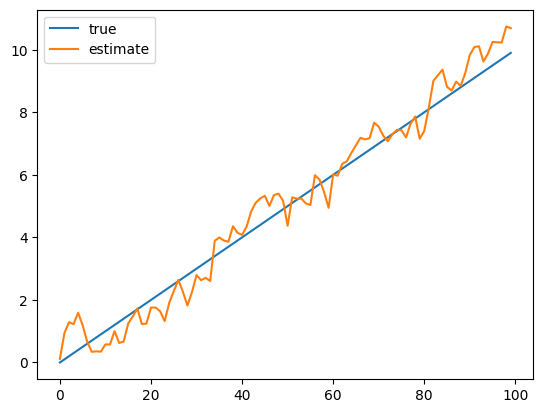

In [14]:
import matplotlib.pyplot as plt
plt.plot([s[0] for s in true_states], label='true')
plt.plot([s[0] for s in est_states], label='estimate')
plt.legend()
plt.show()
